*Installing the Libraries*


In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
Input_path = 'D:\Project\AI_ML_Projects\EMG Classification\dataset\EMG-data.csv'
df = pd.read_csv(Input_path)
print(df.head())
print(df.shape)

   time  channel1  channel2  channel3  channel4  channel5  channel6  channel7  \
0     1   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000   
1     5   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000   
2     6  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
3     7  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   
4     8  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   

   channel8  class  label  
0  -0.00001      0      1  
1  -0.00001      0      1  
2   0.00001      0      1  
3   0.00001      0      1  
4   0.00001      0      1  
(4237907, 11)


In [3]:
print("class :", df["class"].unique())
print()
print("Labels :",df["label"].unique()) # 36 people hand gesture data
print()
print("Value Count :\n",df["class"].value_counts())

class : [0 1 2 3 4 5 6 7]

Labels : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36]

Value Count :
 class
0    2725157
6     253009
5     251733
4     251570
1     250055
3     249494
2     243193
7      13696
Name: count, dtype: int64


In [4]:
features = df.drop(columns=["label","class","time"])
display(features.head())

,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8
0,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001
1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001
2,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001
3,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001
4,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001


In [5]:
dataset=df
print(dataset.shape)
##check for any null/empty values
print("\nempty values:",dataset.isnull().any().sum())

(4237907, 11)

empty values: 0


In [6]:
dataset=dataset.drop(columns=["time"])
Class = dataset["class"]
print(Class.unique())
print("Value Count :\n", dataset["class"].value_counts())

[0 1 2 3 4 5 6 7]
Value Count :
 class
0    2725157
6     253009
5     251733
4     251570
1     250055
3     249494
2     243193
7      13696
Name: count, dtype: int64


In [7]:
##drop gesture 0 because it offers no information due to its unmarked nature
index_numbers_1=dataset[dataset["class"]==0].index
dataset.drop(index_numbers_1,inplace=True)
##drop gesture 7 because it offers no information due to it being performed
##by just two out of 36 patients
index_numbers_2=dataset[dataset["class"]==7].index
dataset.drop(index_numbers_2,inplace=True)

In [8]:
dataset=dataset.groupby(['label','class'])

In [9]:
##functions for extracting sEMG features
def rms(data): ##root mean square
      return  np.sqrt(np.mean(data**2,axis=0))

def SSI(data): ##Simple Square Integral
    return np.sum(data**2,axis=0)

def abs_diffs_signal(data): ##absolute differential signal
    return np.sum(np.abs(np.diff(data,axis=0)),axis=0)

##function for returning an estimator class name
def print_estimator_name(estimator):
    return estimator.__class__.__name__

In [10]:
##tabulating the aggregated sEMG features
dataset=dataset.agg(['min','max',rms,SSI,abs_diffs_signal,np.ptp])

In [11]:
dataset=dataset.reset_index()
dataset.head()

label class channel1                                                         \
                   min      max       rms       SSI abs_diffs_signal      ptp   
0     1     1 -0.00005  0.00004  0.000017  0.000002          0.01070  0.00009   
1     1     2 -0.00111  0.00095  0.000210  0.000301          0.16819  0.00206   
2     1     3 -0.00087  0.00112  0.000188  0.000260          0.14544  0.00199   
3     1     4 -0.00020  0.00016  0.000056  0.000022          0.03609  0.00036   
4     1     5 -0.00031  0.00061  0.000066  0.000030          0.04939  0.00092   

  channel2           ...  channel7                                      \
       min      max  ...       rms       SSI abs_diffs_signal      ptp   
0 -0.00010  0.00007  ...  0.000013  0.000001          0.00870  0.00006   
1 -0.00047  0.00041  ...  0.000216  0.000318          0.16251  0.00153   
2 -0.00113  0.00127  ...  0.000078  0.000044          0.05866  0.00063   
3 -0.00038  0.00024  ...  0.000118  0.000095          0.07517  0.00090   
4 -0.00066  0.00035  ...  0.000084  0.000049          0.06768  0.00055   

  channel8                                                         
       min      max       rms       SSI abs_diffs_signal      ptp  
0 -0.00005  0.00002  0.000014  0.000001          0.00921  0.00007  
1 -0.00070  0.00054  0.000150  0.000153          0.11696  0.00124  
2 -0.00073  0.00051  0.000161  0.000190          0.11869  0.00124  
3 -0.00032  0.00026  0.000083  0.000047          0.04984  0.00058  
4 -0.00030  0.00045  0.000060  0.000025          0.04606  0.00075  

[5 rows x 50 columns]

**SVM Traning**

In [12]:
temp2=dataset
features=dataset.drop(columns=["label","class"])
labels=dataset["class"]

C:\Users\owais\AppData\Local\Temp\ipykernel_13368\72012090.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  features=dataset.drop(columns=["label","class"])


In [13]:
##Training and testing set splitting
X_train, X_test,y_train,y_test= train_test_split(features,labels,test_size=0.30, random_state=1)

In [14]:
## Data normalization
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train -= mean
X_train /= std
X_test -= mean
X_test /= std

In [15]:
## Training SVM Classifier
estimators=[]
accuracy=[]
f1_macro=[]

svc=SVC(C=100,kernel='poly',gamma=0.01,decision_function_shape='ovo')
svc.fit(X_train,y_train)

SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='poly')

In [16]:
y_test_pred=svc.predict(X_test)
# Metrics
y = f1_score(y_test, y_test_pred, average='macro')  # or 'weighted' if classes are imbalanced
x = confusion_matrix(y_test, y_test_pred)
a = accuracy_score(y_test, y_test_pred)

# Precision and Recall
precision = precision_score(y_test, y_test_pred, average='macro')  # 'micro' or 'weighted' as needed
recall = recall_score(y_test, y_test_pred, average='macro')

# Print results
print("F1 Score:", y)
print("Confusion Matrix:\n", x)
print("Accuracy:", a)
print("Precision:", precision)
print("Recall:", recall)

F1 Score: 0.8763772175536881
Confusion Matrix:
 [[11  0  0  0  0  0]
 [ 0  7  1  0  0  0]
 [ 0  0  6  0  0  2]
 [ 0  0  0 11  0  1]
 [ 0  0  0  1 11  1]
 [ 0  0  2  0  0 11]]
Accuracy: 0.8769230769230769
Precision: 0.8861111111111111
Recall: 0.8723290598290597


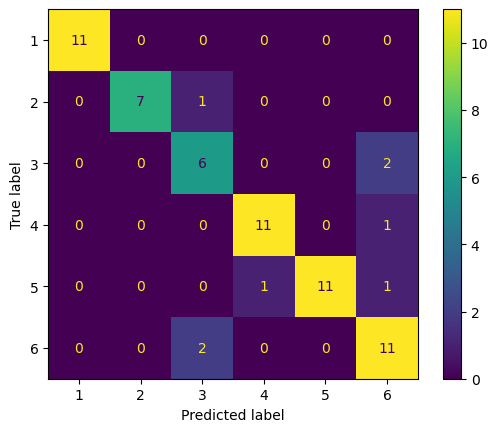

In [19]:
estimators.append(print_estimator_name(svc))
f1_macro.append(y)
accuracy.append(a)
ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test) # Updated function call
plt.show()

In [20]:
estimators

['SVC']

**KNN Training**

In [21]:
dataset=temp2
features=dataset.drop(columns=["label","class"])
labels=dataset["class"]

C:\Users\owais\AppData\Local\Temp\ipykernel_23064\2486602179.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  features=dataset.drop(columns=["label","class"])


In [22]:
X_train, X_test,y_train,y_test= train_test_split(features,labels,test_size=0.30, random_state=1)

In [23]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train -= mean
X_train /= std
X_test -= mean
X_test /= std

In [24]:
## Training KNN Classifier


knn=KNeighborsClassifier(metric='minkowski',algorithm= 'auto',n_neighbors=10,p=2,weights='distance',leaf_size=5)
knn.fit(X_train,y_train)


KNeighborsClassifier(leaf_size=5, n_neighbors=10, weights='distance')

In [25]:
# Predictions
y_test_pred = knn.predict(X_test)

# Metrics
y = f1_score(y_test, y_test_pred, average='macro')  # or 'weighted' if classes are imbalanced
x = confusion_matrix(y_test, y_test_pred)
a = accuracy_score(y_test, y_test_pred)

# Precision and Recall
precision = precision_score(y_test, y_test_pred, average='macro')  # 'micro' or 'weighted' as needed
recall = recall_score(y_test, y_test_pred, average='macro')

# Print results
print("F1 Score:", y)
print("Confusion Matrix:\n", x)
print("Accuracy:", a)
print("Precision:", precision)
print("Recall:", recall)

F1 Score: 0.834884801189149
Confusion Matrix:
 [[11  0  0  0  0  0]
 [ 0  7  1  0  0  0]
 [ 1  0  5  0  0  2]
 [ 0  0  0 12  0  0]
 [ 1  0  0  2 10  0]
 [ 0  1  2  0  0 10]]
Accuracy: 0.8461538461538461
Precision: 0.8394383394383395
Recall: 0.8397435897435898


c:\Users\owais\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\owais\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\owais\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\owais\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

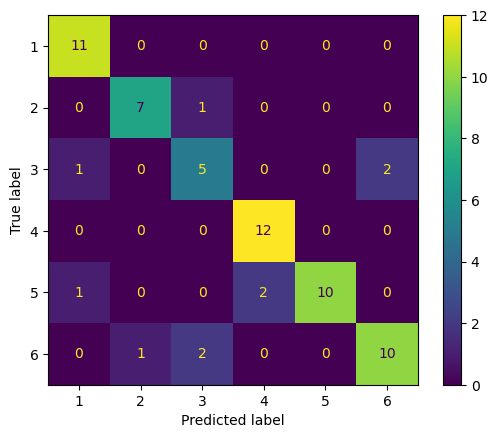

In [26]:
estimators.append(print_estimator_name(knn))
f1_macro.append(y)
accuracy.append(a)
ConfusionMatrixDisplay.from_estimator(knn,X_test,y_test) # Updated function call
plt.show()

In [27]:
estimators

['SVC', 'KNeighborsClassifier']

In [28]:
for i in np.arange(len(estimators)):
    f1_macro[i]=round(f1_macro[i],3)
    accuracy[i]=round(accuracy[i],3)

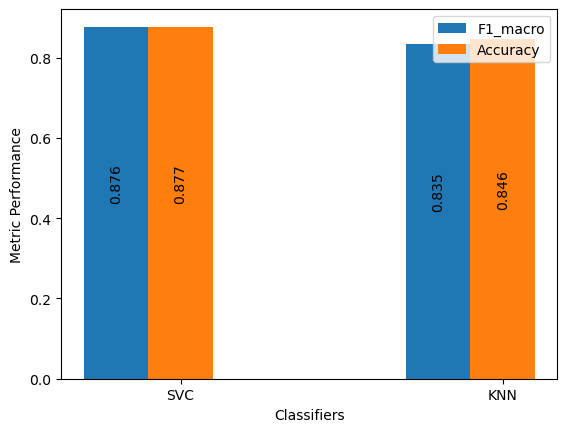

In [29]:
## plotting results of comparative study
estimators=['SVC','KNN']
# Remove duplicate entries in case the cells were run multiple times
estimators = list(dict.fromkeys(estimators))
f1_macro = f1_macro[:len(estimators)]
accuracy = accuracy[:len(estimators)]

fig, ax = plt.subplots()
width=0.2
bar_plot1 = ax.bar(np.arange(len(estimators)),f1_macro,width,tick_label=estimators)
bar_plot2 = ax.bar(np.arange(len(estimators))+width,accuracy,width,tick_label=estimators)

ax.set_xlabel('Classifiers')
ax.set_ylabel('Metric Performance')
ax.legend(('F1_macro','Accuracy'),loc='upper right')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.5*height,height,ha='center', va='bottom', rotation=90)
autolabel(bar_plot1)
autolabel(bar_plot2)
plt.show()